In [351]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
from numpy import matlib


In [310]:
 
T = 10
r = 0.05
sigma = 0.4
S = 100
D = 50
t=0

In [311]:
def price_call(S, K, T, t, r, sigma):
    d1 = 1/(sigma*np.sqrt(T-t))*np.log(S*np.exp(r*(T-t))/K) + sigma*np.sqrt(T-t)/2
    d2 = 1/(sigma*np.sqrt(T-t))*np.log(S*np.exp(r*(T-t))/K) - sigma*np.sqrt(T-t)/2
    return S*stats.norm.cdf(d1) - np.exp(-r*(T-t))*K*stats.norm.cdf(d2)



In [322]:
C0 = price_call(S, K, T, 0, r, sigma) #current value of the firm’s equity
C0

75.38155847862096

In [313]:
## call on call

In [314]:
k = [0.60, 0.80, 1, 1.2]
k = pd.Series(k)*C0
tu = [2,5,7,9]
tau=pd.Series(tu)
s_star = np.zeros((4,4))

In [337]:
s_star = np.zeros((4,4))
#Find s* using a minimisation function
i=0
j=0
for i in range(len(k)):
    for j in range(len(tau)):
        error = lambda X: (price_call(X, D, T, tau[j], r, sigma)-k[i])**2
        s_star[i,j] = scipy.optimize.fmin(func=error,x0=S) 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 34
Optimization terminated successful

In [338]:
s_star

array([[ 71.07559204,  78.38737488,  84.766922  ,  92.25997925],
       [ 87.69226074,  94.96421814, 101.03637695, 107.65327454],
       [103.86741638, 111.05072021, 116.84333801, 122.85415649],
       [119.76531982, 126.84074402, 132.38945007, 137.98118591]])

In [317]:
tau=tau.to_numpy()

In [318]:
a_1 = (np.log(S/s_star) + (r+(sigma**2)/2)*(tau -t))/(sigma*np.sqrt(tau-t))
a_2 = a_1 - sigma*np.sqrt(tau-t)
b_1 = (np.log(S/D) + (r+sigma**2/2)*(T - t))/(sigma*np.sqrt(T-t))
b_2 = b_1 - sigma*np.sqrt(T-t)
rho = np.sqrt((tau-t)/(T-t))
mu= [0, 0]

In [320]:
C = np.zeros((4,4))# %we compute the payoff for k = [0.60; 0.80; 1; 1.2]*payoff
#tau=pd.Series(tu)
i=0
j=0
for i in range(len(k)):
    for j in range(len(tau)):
        cov = [[1, rho[j]], [rho[j], 1]]
        x=[a_1[i,j],b_1] 
        y=[a_2[i,j], b_2]
        C[i,j] = S * mvn.cdf(x,mean=mu, cov=cov) - D * np.exp(-r*(T-t)) * mvn.cdf(y,mean=mu, cov=cov)- np.exp(-r*(tau[j]-t)) * k[i] * norm.cdf(a_2[i,j])
    

In [321]:
C ## Numerical values of the compound option rows different strikes column different maturities 

array([[39.09216585, 49.53140729, 54.77978727, 59.27764682],
       [30.64982974, 43.69253387, 50.00889411, 55.32253533],
       [23.98228379, 38.75141817, 45.86230031, 51.80461377],
       [18.77786021, 34.53438814, 42.22356557, 48.65239087]])

In [348]:
IV = np.zeros((4,4))
i=0
j=0
for i in range(len(k)):
    for j in range(len(tau)):
        error2 = lambda X: (price_call(C0, k[i], tau[j], t, r, X)-C[i,j])**2
        IV[i,j]= scipy.optimize.fmin(func=error2,x0=0.4) 

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 13
         Function evaluations: 26
Optimization terminated successful

In [349]:
IV

array([[0.52804688, 0.55023438, 0.56992188, 0.5971875 ],
       [0.51757813, 0.53742188, 0.5546875 , 0.57765625],
       [0.50976563, 0.5278125 , 0.54328125, 0.563125  ],
       [0.50359375, 0.52015625, 0.53421875, 0.55179688]])

In [386]:
k[::-1]

3    90.457870
2    75.381558
1    60.305247
0    45.228935
dtype: float64

In [397]:
k

0    45.228935
1    60.305247
2    75.381558
3    90.457870
dtype: float64

In [398]:
tau

array([2, 5, 7, 9])

In [399]:
X

array([[2, 5, 7, 9],
       [2, 5, 7, 9],
       [2, 5, 7, 9],
       [2, 5, 7, 9]])

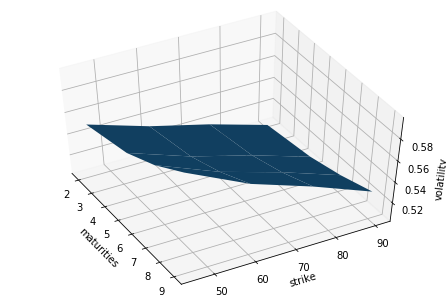

In [411]:
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig, azim = -29, elev = 50)
#Create X and Y data
x = k[::-1]
y = tau[::-1]
X, Y = np.meshgrid(x, y)

#ax.view_init(20,20)
surf = ax.plot_surface(Y, X, IV, antialiased=True)
ax.set_xlabel('maturities')
ax.set_ylabel('strike')
ax.set_zlabel('volatility')
plt.show()